In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [181]:
data = pd.read_csv('./insurance.csv')

In [28]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
data.shape

(1338, 7)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [182]:
data.loc[data['smoker']=='yes', 'smoker']=1
data.loc[data['smoker']=='no', 'smoker']=0
data.loc[data['sex']=='female', 'sex']=1
data.loc[data['sex']=='male', 'sex']=0
data.loc[data['region']=='southwest', 'region']=0
data.loc[data['region']=='southeast', 'region']=1
data.loc[data['region']=='northwest', 'region']=2
data.loc[data['region']=='northeast', 'region']=3

In [32]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.shape

(1338, 7)

In [183]:
from collections import Counter

def detect_outliers(df, n, features): 
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1 
        
        outlier_step = 1.5 * IQR 
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
    
    return multiple_outliers 

In [184]:
Outliers_to_drop = detect_outliers(data, 2, ["charges"])


In [185]:
quartile_1 = data['charges'].quantile(0.25)
quartile_3 = data['charges'].quantile(0.75)
IQR = quartile_3 - quartile_1

In [186]:
search_df = data[(data['charges'] < (quartile_1 - 1.5 * IQR)) | (data['charges'] > (quartile_3 + 1.5 * IQR))]
print(search_df)

      age sex     bmi  children smoker region      charges
14     27   0  42.130         0      1      1  39611.75770
19     30   0  35.300         0      1      0  36837.46700
23     34   1  31.920         1      1      3  37701.87680
29     31   0  36.300         2      1      0  38711.00000
30     22   0  35.600         0      1      0  35585.57600
...   ...  ..     ...       ...    ...    ...          ...
1300   45   0  30.360         0      1      1  62592.87309
1301   62   0  30.875         3      1      2  46718.16325
1303   43   0  27.800         0      1      0  37829.72420
1313   19   1  34.700         2      1      0  36397.57600
1323   42   1  40.370         2      1      1  43896.37630

[139 rows x 7 columns]


In [187]:
data = data.drop(search_df.index, axis = 0)
data.shape

(1199, 7)

In [16]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [188]:
data.loc[Outliers_to_drop]

,age,sex,bmi,children,smoker,region,charges


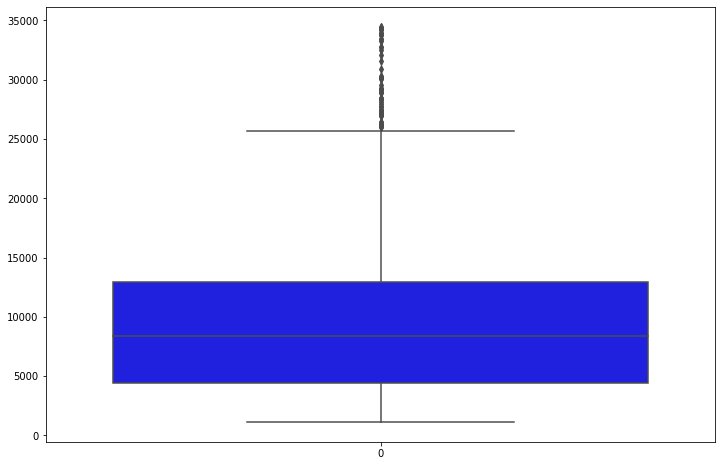

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data['charges'],color='b')
plt.show()

Skewness: 1.178483
Kurtosis: 1.022970


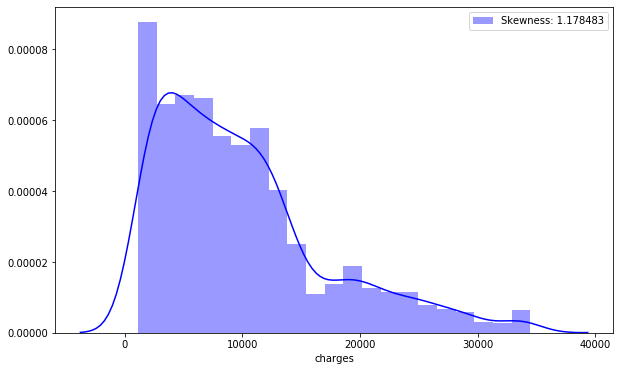

In [40]:
f, ax = plt.subplots(1, 1, figsize = (10,6)) 
g = sns.distplot(data["charges"], color = "b", label="Skewness: {:2f}".format(data["charges"].skew()), ax=ax) 
g = g.legend(loc = "best") 

print("Skewness: %f" % data["charges"].skew()) 
print("Kurtosis: %f" % data["charges"].kurt())

Skewness: -0.328473
Kurtosis: -0.609327


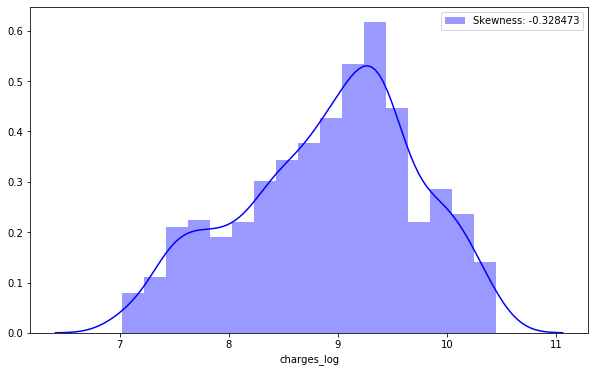

In [41]:
data["charges_log"] = data["charges"].map(lambda i:np.log(i) if i>0 else 0) 

f, ax = plt.subplots(1, 1, figsize = (10,6)) 
g = sns.distplot(data["charges_log"], color = "b", label="Skewness: {:2f}".format(data["charges_log"].skew()), ax=ax) 
g = g.legend(loc = "best") 

print("Skewness: %f" % data['charges_log'].skew()) 
print("Kurtosis: %f" % data['charges_log'].kurt()) 

#df_train.drop('SalePrice', axis= 1, inplace=True)

In [42]:
data.describe()

,age,bmi,children,charges,charges_log
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237,9927.753402,8.919993
std,14.068040,6.010551,1.214304,7241.158309,0.796424
min,18.000000,15.960000,0.000000,1121.873900,7.022756
25%,26.000000,25.800000,0.000000,4408.695900,8.391333
50%,39.000000,29.735000,1.000000,8410.046850,9.037182
75%,51.000000,33.820000,2.000000,12953.594600,9.469129
max,64.000000,53.130000,5.000000,34472.841000,10.447927


In [43]:
data.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
charges_log    0
dtype: int64

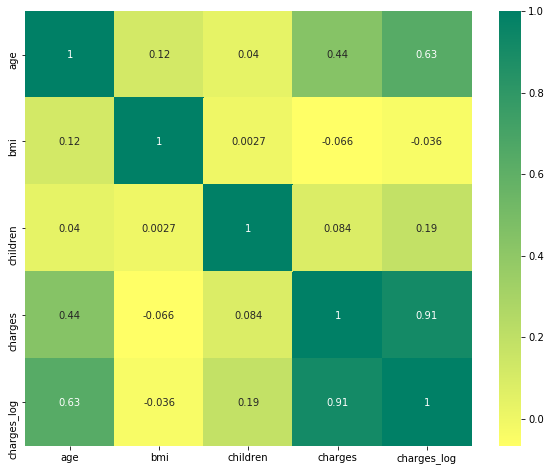

In [23]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

In [83]:
corr = data.corr(method='pearson')

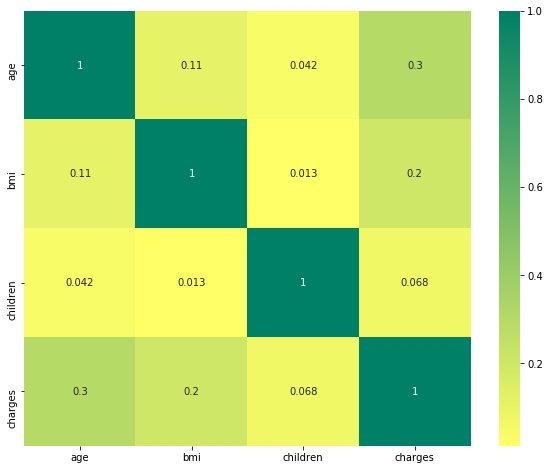

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

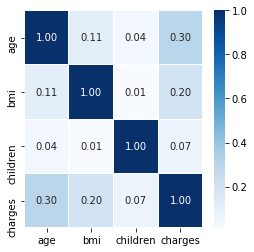

In [155]:
plt.figure(figsize=(4,4))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.1, cmap='Blues')

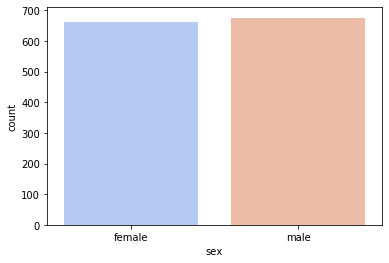

In [22]:
sns.countplot(x = 'sex', data = data,palette='coolwarm')

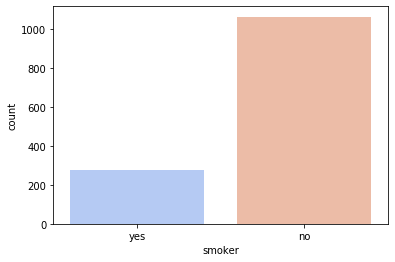

In [24]:
sns.countplot(x = 'smoker', data = data,palette='coolwarm')

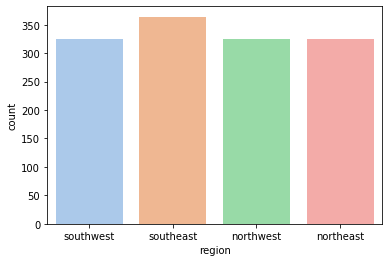

In [8]:
sns.countplot(x = 'region', data = data,palette='pastel')

In [9]:
data.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

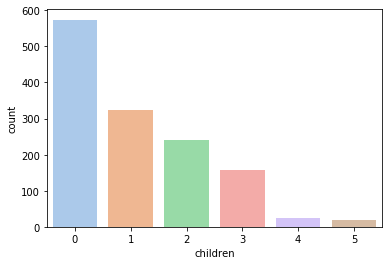

In [62]:
sns.countplot(x = 'children', data = data,palette='pastel')

In [20]:
li_cat_feats = ['sex','smoker','region']

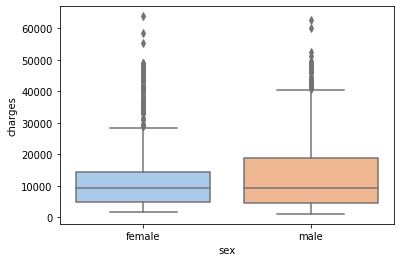

In [17]:
sns.boxplot(x=li_cat_feats[0], y=data["charges"], data=data, palette='pastel') 

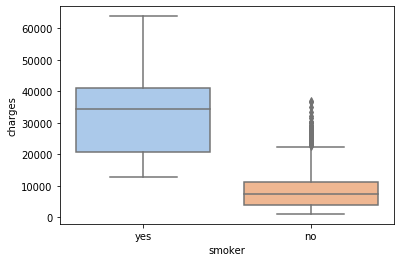

In [19]:
sns.boxplot(x=li_cat_feats[1], y=data["charges"], data=data, palette='pastel') 

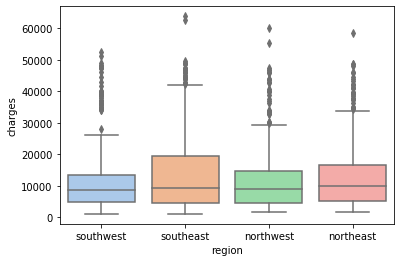

In [18]:
sns.boxplot(x=li_cat_feats[2], y=data["charges"], data=data, palette='pastel') 

In [46]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [48]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [47]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [45]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

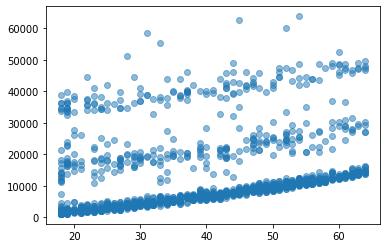

In [88]:
x = data['age'].values
y = data['charges'].values

import matplotlib.pyplot as plt
plt.scatter(x,y, alpha = 0.5)
plt.show()

In [21]:
x = data.values

In [22]:
data

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,7.604867


In [23]:
import pandas as pd
pd.get_dummies(data['region'])
pd.get_dummies(data['sex'])
pd.get_dummies(data['smoker'])

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [24]:
data = pd.get_dummies(data['region'])

In [25]:
pd.get_dummies(data)

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1333,0,0,1,0
1334,0,0,0,1
1335,0,1,0,0
1336,1,0,0,0


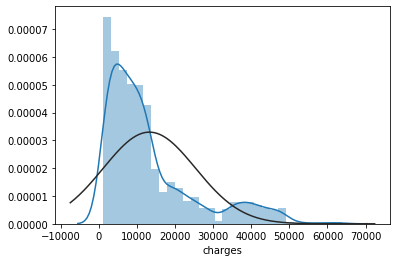

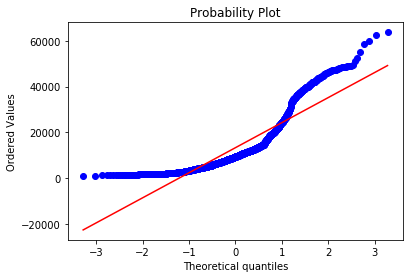

In [105]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm

sns.distplot(data['charges'], fit = norm)
fig = plt.figure()
res = stats.probplot(data['charges'],plot = plt)

In [ ]:
plt.figure(figsize=(6,5))
chart = sns.countplot(y = 'smoker', hue = 'smoker', data = data)
chart.set_yticklabels(['female', 'male'])

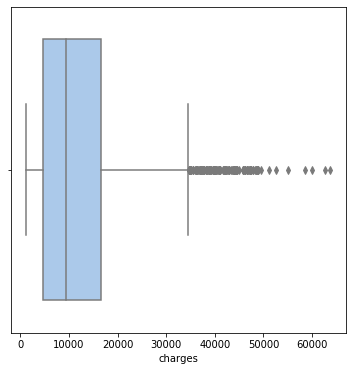

In [107]:
plt.figure(figsize=(6,6))
sns.boxplot(data['charges'], palette='pastel')
plt.show()

In [109]:
df['sex'] = df['sex'].apply({'male':0,'female':1}.get) 
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [110]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,2.484305,1.104885,1.0000,2.00000,2.000,3.000000,4.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


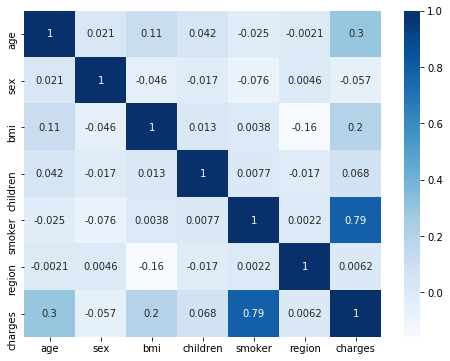

In [114]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap = 'Blues')

In [141]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= 'asdf' ,alpha=0.6)
plt.show()

ValueError: asdf is not a valid palette name

<Figure size 576x432 with 0 Axes>

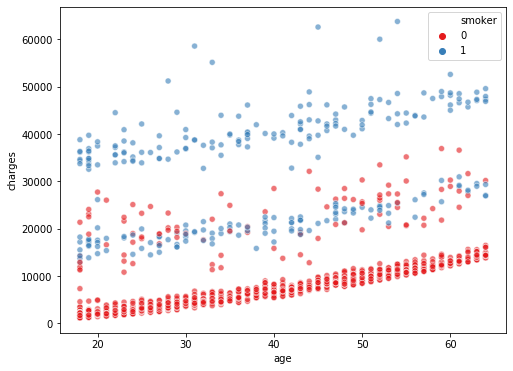

In [154]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= 'Set1' ,alpha=0.6)
plt.show()

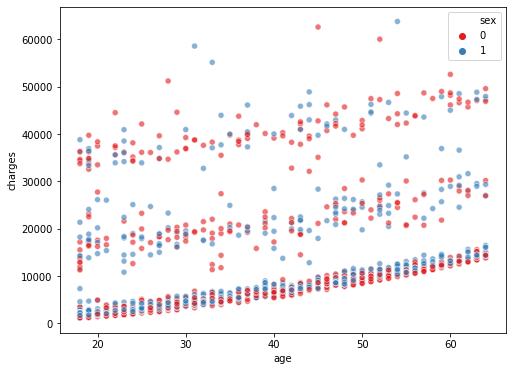

In [158]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= 'Set1' ,alpha=0.6)
plt.show()

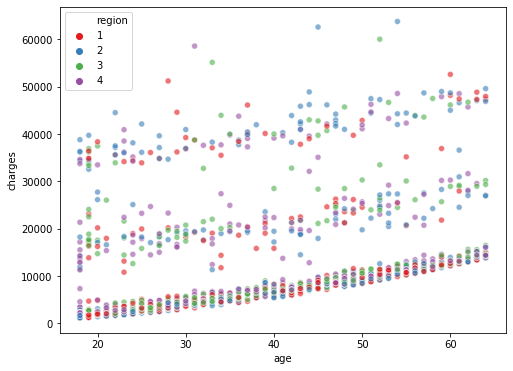

In [159]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.region,palette= 'Set1' ,alpha=0.6)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.region,palette= 'Set1' ,alpha=0.6)
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

In [16]:
def get_dummy(df,columns,base_value=None):
    '''
    df : 데이터프레임
    columns : 가변수로 변환할 칼럼들
    base_value : {가변수로 변환할 칼럼명 : 제외시킬 범주}
    '''
    for c in columns:
        num_level = len(set(df[c])) ## 유니크한 원소의 개수
        uniq_element = sorted(list(set(df[c])))[1:] ## 정렬했을 때 첫 번째 범주를 제외
        
        if base_value: ## 제외시킬 범주가 있을 경우 해당 범주를 제외
            if c in base_value.keys():
                assert base_value[c] in list(set(df[c])), f'{base_value[c]} is not contained in {c}'
                uniq_element = sorted(list(set(df[c])-{base_value[c]}))
                    
        data = dict()
        for i in range(num_level-1):
            dummy_data = []
            val = uniq_element[i]
            for d in df[c]: ## 해당 범주인 경우만 1 나머지는 0
                if d == val:
                    dummy_data.append(1)
                else:
                    dummy_data.append(0)
            col_name = c+'_'+str(val) ## 갸변수의 칼럼명 지정
            data[col_name] = dummy_data
        
        temp_df = pd.DataFrame(data)
        df = pd.concat([df,temp_df],axis=1) ## 가변수 칼럼을 원 데이터 뒤에 결합
 
    return df.drop(columns=columns)

In [189]:
import pandas as pd
region = pd.get_dummies(data['region'])
sex = pd.get_dummies(data['sex'])
smoker = pd.get_dummies(data['smoker'])

In [217]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [218]:
lin_data = data.drop(columns=['region','sex','smoker'])

In [191]:
sex

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,0,1
1335,0,1
1336,0,1


In [222]:
lin_data = lin_data.rename({0:'male',1:'female'},axis='columns')

In [220]:
lin_data = pd.concat([lin_data,sex],axis=1)

In [223]:
lin_data

,age,bmi,children,charges,male,female
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,1
1335,18,36.850,0,1629.83350,0,1
1336,21,25.800,0,2007.94500,0,1


In [ ]:
northeast	northwest	southeast	southwest

In [224]:
lin_data = pd.concat([lin_data,region],axis=1)

In [225]:
lin_data = lin_data.rename({0:'southwest',1:'southeast',2:'northwest',3:'northeast'},axis='columns')

In [226]:
lin_data

,age,bmi,children,charges,male,female,southwest,southeast,northwest,northeast
0,19,27.900,0,16884.92400,0,1,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0,1,0
1334,18,31.920,0,2205.98080,0,1,0,0,0,1
1335,18,36.850,0,1629.83350,0,1,0,1,0,0
1336,21,25.800,0,2007.94500,0,1,1,0,0,0


In [227]:
lin_data = pd.concat([lin_data,smoker],axis=1)

In [203]:
lin_data

,age,bmi,children,charges,male,female,southwest,southeast,northwest,northeast,0,1
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,0,1,0,1,0
4,32,28.880,0,3866.85520,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0,1,0,1,0
1334,18,31.920,0,2205.98080,0,1,0,0,0,1,1,0
1335,18,36.850,0,1629.83350,0,1,0,1,0,0,1,0
1336,21,25.800,0,2007.94500,0,1,1,0,0,0,1,0


In [228]:
lin_data = lin_data.rename({0:'no_smoker',1:'yes_smoker'},axis='columns')

In [229]:
lin_data

,age,bmi,children,charges,male,female,southwest,southeast,northwest,northeast,no_smoker,yes_smoker
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,0,1,0,1,0
4,32,28.880,0,3866.85520,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0,1,0,1,0
1334,18,31.920,0,2205.98080,0,1,0,0,0,1,1,0
1335,18,36.850,0,1629.83350,0,1,0,1,0,0,1,0
1336,21,25.800,0,2007.94500,0,1,1,0,0,0,1,0


In [231]:
lin = lin_data

In [80]:
lin.columns

Index(['age', 'bmi', 'children', 'charges', 'charges_log', 'male', 'female',
       'southwest', 'southeast', 'northwest', 'northeast', 'no_smoker',
       'yes_smoker'],
      dtype='object')

In [232]:
lin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1199 non-null   int64  
 1   bmi         1199 non-null   float64
 2   children    1199 non-null   int64  
 3   charges     1199 non-null   float64
 4   male        1199 non-null   uint8  
 5   female      1199 non-null   uint8  
 6   southwest   1199 non-null   uint8  
 7   southeast   1199 non-null   uint8  
 8   northwest   1199 non-null   uint8  
 9   northeast   1199 non-null   uint8  
 10  no_smoker   1199 non-null   uint8  
 11  yes_smoker  1199 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 96.2 KB


In [278]:
lin = lin.reindex(columns=['age', 'bmi', 'children',  'male', 'female', 'southwest',
       'southeast', 'northwest', 'northeast', 'no_smoker', 'yes_smoker','charges'])

In [279]:
lin

,age,bmi,children,male,female,southwest,southeast,northwest,northeast,no_smoker,yes_smoker,charges
0,19,27.900,0,0,1,1,0,0,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,0,0,1,0,1,0,21984.47061
4,32,28.880,0,1,0,0,0,1,0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0,0,1,0,1,0,10600.54830
1334,18,31.920,0,0,1,0,0,0,1,1,0,2205.98080
1335,18,36.850,0,0,1,0,1,0,0,1,0,1629.83350
1336,21,25.800,0,0,1,1,0,0,0,1,0,2007.94500



# 1. Linear Regression

In [84]:
X = lin.iloc[:, :-1]
y = lin.iloc[:, -1]

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split




X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=321)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
line_fitter = LinearRegression()
line_fitter.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_predicted = line_fitter.predict(X)

In [89]:
line_fitter.coef_

array([ 0.03710224,  0.00624769,  0.10954679, -0.03763364,  0.03763364,
       -0.05894161, -0.07532202,  0.03136484,  0.10289878, -0.65912046,
        0.65912046])

In [90]:
line_fitter.intercept_

7.681749953905468

In [91]:
line_fitter.score(X_test,Y_test)

0.7407373433823492

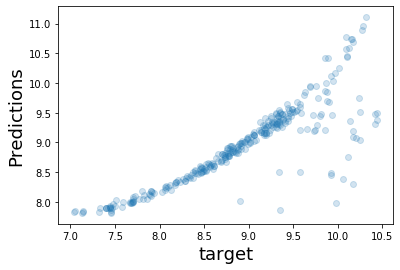

In [93]:
y_hat_test = line_fitter.predict(X_test) 

plt.scatter(Y_test, y_hat_test, alpha=0.2) 
plt.xlabel('target',size=18) 
plt.ylabel('Predictions',size=18) 
plt.show()

In [94]:
# 선형 모델의 절편값 β0 # 추정된 상수항
beta0 = line_fitter.intercept_

# 선형 모델의 기울기값 β1 # 추정된 가중치 벡터
beta1 = line_fitter.coef_
print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5 + {} x6 + {} x7 + {} x8 {} x9 + {} x10 + {} x11'.format(round(beta0,3), round(beta1[0],3), round(beta1[1],3),\
                                                    round(beta1[2],3),round(beta1[3],3), round(beta1[4],3),round(beta1[5],3), round(beta1[6],3), round(beta1[7],3),round(beta1[8],3),
                                                                                                             round(beta1[9],3),round(beta1[10],3)))

y = 7.682 + 0.037 x1 + 0.006 x2 + 0.11 x3 + -0.038 x4 + 0.038 x5 + -0.059 x6 + -0.075 x7 + 0.031 x8 0.103 x9 + -0.659 x10 + 0.659 x11


In [95]:
y_pred = line_fitter.predict(X_test)
print(np.round(list(y_pred),3))

[ 9.231  8.603  9.295  8.797  8.34   9.531  8.986  9.516  9.411  8.116
  9.308  9.264  9.512  8.322  8.568  9.476  9.013  8.406  9.201  8.842
  8.399  8.943  8.766  9.292  8.33   9.14   8.287  7.834  8.529  8.353
  8.911 10.026  8.631  8.761  9.262  7.919  9.345  9.453  9.841  9.945
  8.863  8.774 10.429  9.01   8.67   9.055  9.743  8.503  9.409  9.504
  8.502  8.512 10.421  7.915  8.552  9.365  8.82   9.084  8.33   9.339
  8.121  8.872  9.019  9.209  8.544  8.892  9.956  8.819  8.187  9.47
  9.302  9.645  9.368  8.522  8.902  9.264  9.267  7.988  9.328  9.121
  8.841  9.46   9.33   8.179  8.509  9.163  9.344  9.177  8.513  9.491
  8.911  7.904 10.161 10.008  8.502  8.607  9.263  8.99   7.991  9.474
  8.15   7.934  9.412  8.247 10.251  9.354  9.648  8.49   8.695  8.939
  8.     8.633  9.499  8.606  8.805  9.45   9.004  8.866  8.72   9.342
  8.459  8.416  8.138  9.022  9.311  9.703  8.816  9.225  7.894  9.471
  9.867  8.294  9.686 10.777  7.981 10.457  7.959  7.821  8.054  8.996
  9.126

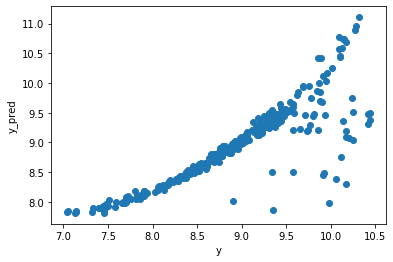

In [96]:
# 실측치y와 예측치y의 관계성 #
plt.scatter(Y_test, y_pred)
#line = np.linspace(min(Y_test.values), max(Y_test.values), 1000)
#plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

In [97]:
from sklearn.metrics import r2_score as r2
r2 = np.round(r2(Y_test, y_pred),3)
r2

0.741

In [98]:
## 조정된 결정계수
n, p = lin.iloc[:,1:].shape

adj_r2 = 1 - ((1-r2) * (n-1)) / (n-p-1)
adj_r2

0.7385998315080033

In [99]:
import statsmodels.api as sm 

In [100]:
X1 = sm.add_constant(X_train)
reg = sm.OLS(Y_train, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            charges_log   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     259.6
Date:                Fri, 11 Jun 2021   Prob (F-statistic):          1.02e-226
Time:                        02:03:10   Log-Likelihood:                -531.43
No. Observations:                 899   AIC:                             1081.
Df Residuals:                     890   BIC:                             1124.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4141      0.038     91.000      0.000       3.340       3.488
age            0.0371      0.001     35.601      0.000       0.035       0.039
bmi            0.0062      0.003      2.355      0.019       0.001       0.011
children       0.1095      0.012      8.964      0.000       0.086       0.134
male           1.6694      0.024     69.335      0.000       1.622       1.717
female         1.7447      0.024     73.984      0.000       1.698       1.791
southwest      0.7946      0.027     29.093      0.000       0.741       0.848
southeast      0.7782      0.030     26.127      0.000       0.720       0.837
northwest      0.8849      0.026     34.019      0.000       0.834       0.936
northeast      0.9564      0.026     36.113      0.000       0.904       1.008
no_smoker      1.0479      0.031     33.771      0.000       0.987       1.109
yes_smoker     2.3662      0.030     79.239      0.000       2.308       2.425
==============================================================================
Omnibus:                      435.893   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2200.244
Skew:                           2.257   Prob(JB):                         0.00
Kurtosis:                       9.194   Cond. No.                     6.37e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.74e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Step 2. '흡연 여부' 삭제 후 모델링

- EDA 결과 흡연여부가 보험료에 중요한 영향을 미치는 것으로 판단하여 흡연여부를 삭제하여 모델링 한 뒤 차이점을 비교해보고자 함 

## 1. 흡연 여부 삭제한 후 Linear Regression

In [280]:
lin_drop_smoker = lin.drop(['yes_smoker','no_smoker'],axis=1).reset_index(drop=True)

In [281]:
lin_drop_smoker

,age,bmi,children,male,female,southwest,southeast,northwest,northeast,charges
0,19,27.900,0,0,1,1,0,0,0,16884.92400
1,18,33.770,1,1,0,0,1,0,0,1725.55230
2,28,33.000,3,1,0,0,1,0,0,4449.46200
3,33,22.705,0,1,0,0,0,1,0,21984.47061
4,32,28.880,0,1,0,0,0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1194,50,30.970,3,1,0,0,0,1,0,10600.54830
1195,18,31.920,0,0,1,0,0,0,1,2205.98080
1196,18,36.850,0,0,1,0,1,0,0,1629.83350
1197,21,25.800,0,0,1,1,0,0,0,2007.94500


In [102]:
X = lin_drop_smoker.iloc[:, :-1]
y = lin_drop_smoker.iloc[:, -1]

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=321)

In [104]:
line_fitter = LinearRegression()
line_fitter.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
y_predicted = line_fitter.predict(X)

In [106]:
line_fitter.score(X_test,Y_test)

0.46408235651534435

In [107]:
# 선형 모델의 절편값 β0 # 추정된 상수항
beta0 = line_fitter.intercept_

# 선형 모델의 기울기값 β1 # 추정된 가중치 벡터
beta1 = line_fitter.coef_
print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5 + {} x6 + {} x7 + {} x8 {} x9 '.format(round(beta0,3), round(beta1[0],3), round(beta1[1],3),\
                                                    round(beta1[2],3),round(beta1[3],3), round(beta1[4],3),round(beta1[5],3), round(beta1[6],3), round(beta1[7],3),round(beta1[8],3)
                                                                                                             ))

y = 7.773 + 0.036 x1 + -0.012 x2 + 0.106 x3 + -0.023 x4 + 0.023 x5 + -0.097 x6 + -0.036 x7 + 0.025 x8 0.108 x9 


In [108]:
y_pred = line_fitter.predict(X_test)
print(np.round(list(y_pred),3))

[ 8.199  8.686  9.399  8.729  8.347  9.697  9.262  9.284  9.352  8.288
  9.289  9.515  9.543  8.568  8.567  9.587  9.052  8.606  9.227  9.162
  8.429  8.966  8.909  9.482  8.352  9.144  8.44   8.187  8.721  8.558
  8.92   8.918  8.667  8.811  9.355  8.188  9.533  9.471  8.769  9.018
  9.236  9.     9.408  9.113  8.777  9.094  9.726  8.688  9.471  9.744
  8.583  8.64   9.418  8.211  8.587  9.448  9.134  9.228  8.547  9.461
  8.306  9.213  9.137  9.427  8.692  9.151 10.03   9.015  8.034  8.393
  8.138  9.888  9.203  8.497  8.796  9.613  9.324  8.245  9.557  9.437
  8.901  8.429  9.512  8.438  8.49   9.33   9.412  9.412  8.829  8.343
  9.048  7.916  9.144  8.994  8.562  8.51   9.461  9.004  8.254  9.446
  8.376  8.159  9.382  8.512  9.105  9.492  9.645  8.743  8.757  8.901
  8.16   8.945  9.737  8.843  8.801  9.432  9.114  8.985  8.788  9.502
  8.646  8.538  8.291  9.198  9.288  8.599  9.057  9.324  8.179  9.462
  8.841  8.39   8.509  9.693  8.2    9.267  7.888  7.967  8.117  9.12
  9.189

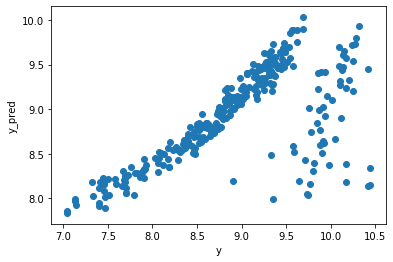

In [109]:
# 실측치y와 예측치y의 관계성 #
plt.scatter(Y_test, y_pred)
#line = np.linspace(min(Y_test.values), max(Y_test.values), 1000)
#plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

In [110]:
from sklearn.metrics import r2_score as r2
r2 = np.round(r2(Y_test, y_pred),3)
r2

0.464

In [111]:
## 조정된 결정계수
n, p = lin.iloc[:,1:].shape

adj_r2 = 1 - ((1-r2) * (n-1)) / (n-p-1)
adj_r2

0.45903285593934284

In [112]:
SSE = sum((Y_test-y_pred)**2)
SSR = sum((y_pred-np.mean(Y_test))**2)
SST = SSE + SSR
SSE,SSR,SST

(100.41177255343523, 82.8564761382854, 183.26824869172063)

In [114]:
X1 = sm.add_constant(X_train)
reg = sm.OLS(Y_train, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            charges_log   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     102.3
Date:                Fri, 11 Jun 2021   Prob (F-statistic):          1.32e-109
Time:                        02:05:05   Log-Likelihood:                -807.56
No. Observations:                 899   AIC:                             1631.
Df Residuals:                     891   BIC:                             1670.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4420      0.065     67.825      0.000       4.313       4.571
age            0.0360      0.001     25.420      0.000       0.033       0.039
bmi           -0.0122      0.003     -3.498      0.000      -0.019      -0.005
children       0.1060      0.017      6.382      0.000       0.073       0.139
male           2.1985      0.039     56.827      0.000       2.123       2.274
female         2.2435      0.038     59.029      0.000       2.169       2.318
southwest      1.0135      0.038     26.334      0.000       0.938       1.089
southeast      1.0745      0.042     25.365      0.000       0.991       1.158
northwest      1.1358      0.036     31.152      0.000       1.064       1.207
northeast      1.2183      0.037     32.918      0.000       1.146       1.291
==============================================================================
Omnibus:                      275.434   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.059
Skew:                           1.659   Prob(JB):                    6.94e-142
Kurtosis:                       5.519   Cond. No.                     6.66e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.25e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 2. Regression Tree

In [282]:
X = lin.iloc[:, :-1]
y = lin.iloc[:, -1]

In [235]:
col_names = list(lin.columns)

In [286]:
col_names = ['age', 'bmi', 'children', 'male', 'female', 'southwest', 'southeast',
       'northwest', 'northeast', 'no_smoker', 'yes_smoker']

In [283]:
import numpy as np
from sklearn.model_selection import train_test_split




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

In [117]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [119]:
from sklearn.model_selection import GridSearchCV

In [129]:
parameters = {
    "max_depth":[1,2,3,4,5,6],
    'max_features':[2,3,4,5,6]
    }

In [273]:
param_grid = {'criterion':['mse','friedman_mse','mae'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3], 'max_features':[None,'sqrt','log2',3,4,5]}

In [284]:
reg_tree = GridSearchCV(dtr(), param_grid, cv=5, n_jobs=-1)

reg_tree.fit(X_train, y_train)
print(reg_tree.score(X_train, y_train))
print(reg_tree.best_params_)

0.6454712850899158
{'criterion': 'mse', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [134]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

In [287]:
# 문자열 데이터를저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 데이터를 보일지
tree.export_graphviz(reg_tree.best_estimator_, feature_names=col_names, out_file = dot_file, filled =True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="yes_smoker <= 0.5\\nmse = 52282198.601\\nsamples = 899\\nvalue = 9991.184", fillcolor="#f9e4d5"] ;\n1 [label="age <= 43.5\\nmse = 34574042.53\\nsamples = 797\\nvalue = 8468.775", fillcolor="#fbeadf"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="age <= 26.5\\nmse = 23978285.584\\nsamples = 445\\nvalue = 5508.835", fillcolor="#fdf7f2"] ;\n1 -> 2 ;\n3 [label="children <= 1.5\\nmse = 25188670.8\\nsamples = 203\\nvalue = 4047.613", fillcolor="#fffdfb"] ;\n2 -> 3 ;\n4 [label="mse = 20746857.267\\nsamples = 164\\nvalue = 3462.967", fillcolor="#ffffff"] ;\n3 -> 4 ;\n5 [label="mse = 36385419.463\\nsamples = 39\\nvalue = 6506.126", fillcolor="#fcf3eb"] ;\n3 -> 5 ;\n6 [label="children <= 0.5\\nmse = 19669462.384\\nsamples = 242\\nvalue = 6734.571", fillcolor="#fcf2ea"] ;\n2 -> 6 ;\n7 [label="mse = 13190463.854\\nsamples = 65\\nvalue = 5345.195", fillcolor="#fdf7f3"] ;\n6 -> 7 ;\n8 [label="

In [145]:
ii = Image(graph.create_png())

In [415]:
lin

,age,bmi,children,male,female,southwest,southeast,northwest,northeast,no_smoker,yes_smoker,charges
0,19,27,0,0,1,1,0,0,0,0,1,16884
1,18,33,1,1,0,0,1,0,0,1,0,1725
2,28,33,3,1,0,0,1,0,0,1,0,4449
3,33,22,0,1,0,0,0,1,0,1,0,21984
4,32,28,0,1,0,0,0,1,0,1,0,3866
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,1,0,0,0,1,0,1,0,10600
1334,18,31,0,0,1,0,0,0,1,1,0,2205
1335,18,36,0,0,1,0,1,0,0,1,0,1629
1336,21,25,0,0,1,1,0,0,0,1,0,2007


In [277]:
X_train

,age,bmi,children,charges,male,female,southwest,southeast,northwest,northeast,no_smoker
226,28,38.060,0,2689.49540,1,0,0,1,0,0,1
555,28,23.800,2,3847.67400,1,0,1,0,0,0,1
1299,19,25.745,1,2710.82855,0,1,0,0,1,0,1
1170,18,27.360,1,17178.68240,1,0,0,0,0,1,0
1239,25,42.130,1,3238.43570,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
190,61,31.570,0,12557.60530,1,0,0,1,0,0,1
892,54,24.035,0,10422.91665,1,0,0,0,0,1,1
141,26,32.490,1,3490.54910,1,0,0,0,0,1,1
600,18,39.160,0,1633.04440,0,1,0,1,0,0,1


In [289]:
col_names

Index(['age', 'bmi', 'children', 'male', 'female', 'southwest', 'southeast',
       'northwest', 'northeast', 'no_smoker', 'yes_smoker', 'charges'],
      dtype='object')

In [291]:
X_train

,age,bmi,children,male,female,southwest,southeast,northwest,northeast,no_smoker,yes_smoker
226,28,38.060,0,1,0,0,1,0,0,1,0
555,28,23.800,2,1,0,1,0,0,0,1,0
1299,19,25.745,1,0,1,0,0,1,0,1,0
1170,18,27.360,1,1,0,0,0,0,1,0,1
1239,25,42.130,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
190,61,31.570,0,1,0,0,1,0,0,1,0
892,54,24.035,0,1,0,0,0,0,1,1,0
141,26,32.490,1,1,0,0,0,0,1,1,0
600,18,39.160,0,0,1,0,1,0,0,1,0


In [292]:
boston_xx

,age,bmi,children,male,female,southwest,southeast,northwest,northeast,no_smoker,yes_smoker,charges
226,28,38.060,0,1,0,0,1,0,0,1,0,2689.49540
555,28,23.800,2,1,0,1,0,0,0,1,0,3847.67400
1299,19,25.745,1,0,1,0,0,1,0,1,0,2710.82855
1170,18,27.360,1,1,0,0,0,0,1,0,1,17178.68240
1239,25,42.130,1,0,1,0,1,0,0,1,0,3238.43570
...,...,...,...,...,...,...,...,...,...,...,...,...
190,61,31.570,0,1,0,0,1,0,0,1,0,12557.60530
892,54,24.035,0,1,0,0,0,0,1,1,0,10422.91665
141,26,32.490,1,1,0,0,0,0,1,1,0,3490.54910
600,18,39.160,0,0,1,0,1,0,0,1,0,1633.04440


In [293]:
col_names = lin.columns
boston_xx = pd.DataFrame(data=X_train, columns= col_names, index=y_train.index)
boston_xx['charges'] = y_train
yy = boston_xx.charges.copy()
del boston_xx['charges']
boston_ = pd.concat((boston_xx,yy), axis=1)
boston_

,age,bmi,children,male,female,southwest,southeast,northwest,northeast,no_smoker,yes_smoker,charges
226,28,38.060,0,1,0,0,1,0,0,1,0,2689.49540
555,28,23.800,2,1,0,1,0,0,0,1,0,3847.67400
1299,19,25.745,1,0,1,0,0,1,0,1,0,2710.82855
1170,18,27.360,1,1,0,0,0,0,1,0,1,17178.68240
1239,25,42.130,1,0,1,0,1,0,0,1,0,3238.43570
...,...,...,...,...,...,...,...,...,...,...,...,...
190,61,31.570,0,1,0,0,1,0,0,1,0,12557.60530
892,54,24.035,0,1,0,0,0,0,1,1,0,10422.91665
141,26,32.490,1,1,0,0,0,0,1,1,0,3490.54910
600,18,39.160,0,0,1,0,1,0,0,1,0,1633.04440


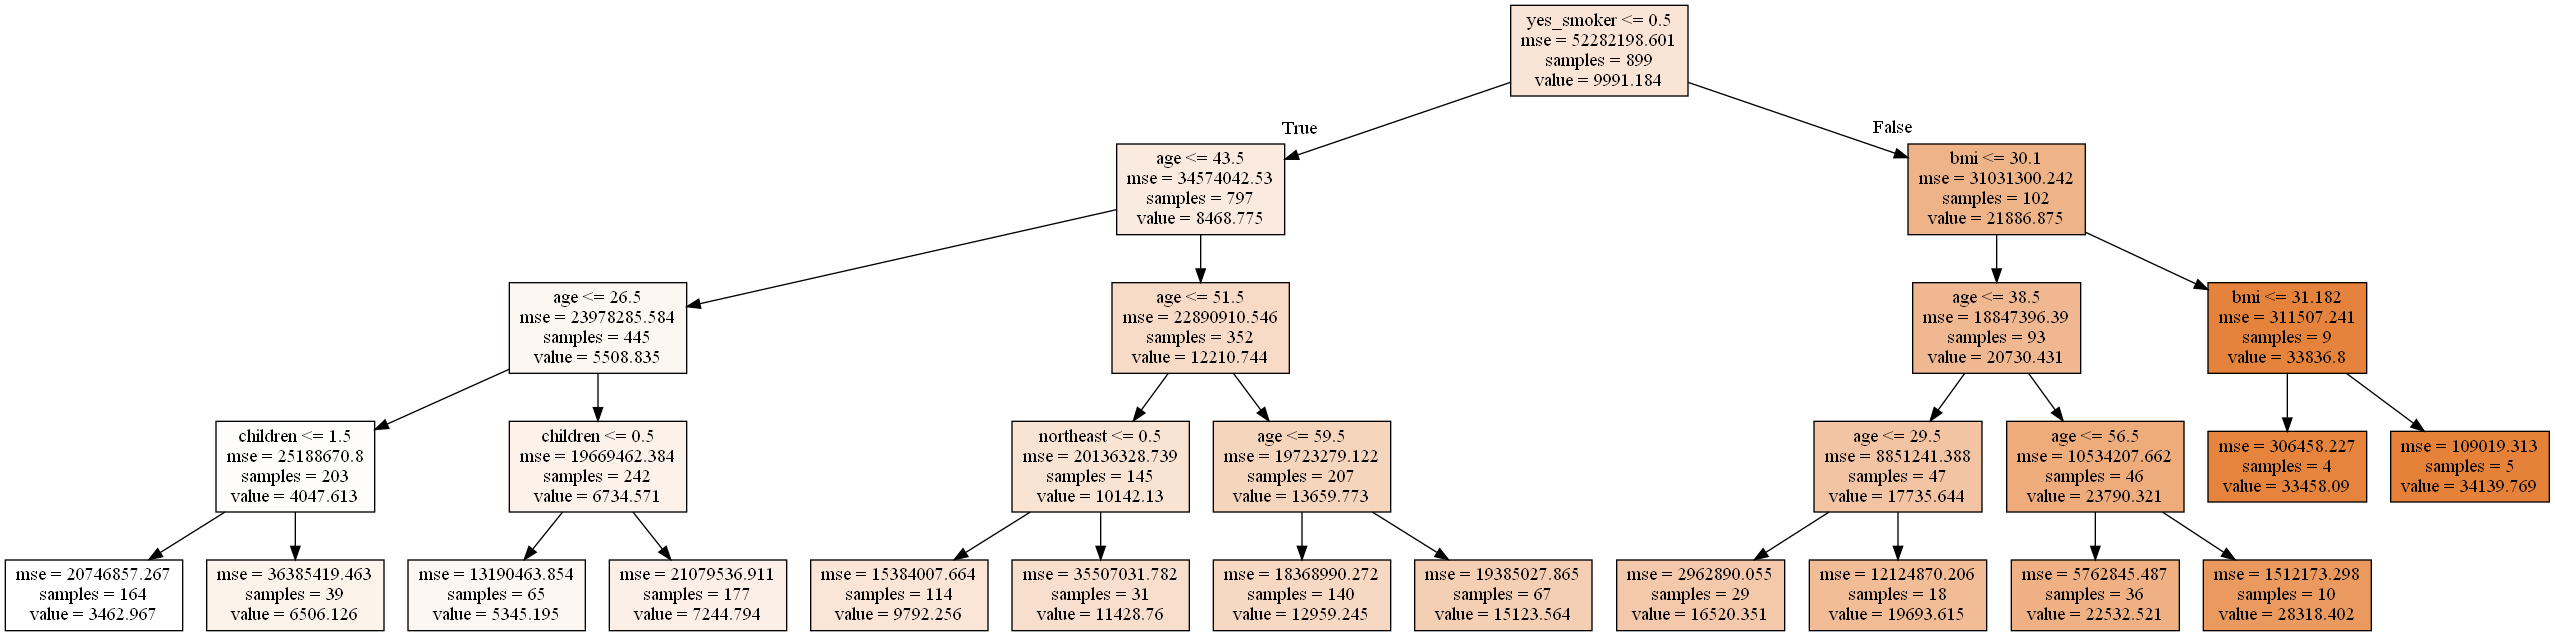

In [294]:
Image(graph.create_png())

In [295]:
# jpg, png, pdf 등으로 생성가능
graph.write_png("./reg_tree1.jpg")

True

In [296]:
# Root node의 MSE
Root_MSE = sum((boston_['charges'] - boston_['charges'].mean())**2) / len(boston_['charges'])
print(Root_MSE)

# y값의 mean
Root_mean = boston_['charges'].mean()
Root_mean

52282198.60082794


9991.184441902104

In [156]:
lin.columns

Index(['age', 'bmi', 'children', 'male', 'female', 'southwest', 'southeast',
       'northwest', 'northeast', 'no_smoker', 'yes_smoker', 'charges_log'],
      dtype='object')

In [297]:
col = ['age', 'bmi', 'children', 'male', 'female', 'southwest', 'southeast',
       'northwest', 'northeast', 'no_smoker', 'yes_smoker']

In [298]:
reg_tree_im = reg_tree.best_estimator_.feature_importances_

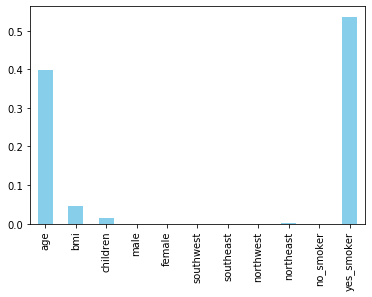

In [299]:
reg_tree_im = pd.Series(reg_tree_im, col)
reg_tree_im.plot(kind='bar', color='skyblue')

In [300]:
print("훈련 세트 정확도: {:.3f}".format(reg_tree.best_estimator_.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree.best_estimator_.score(X_test, y_test)))

훈련 세트 정확도: 0.645
테스트 세트 정확도: 0.674


## 2.  흡연여부 제거한 Regression Tree

In [166]:
col_names = lin_drop_smoker.columns

In [301]:
col_names = ['age', 'bmi', 'children', 'male', 'female', 'southwest', 'southeast',
       'northwest', 'northeast']

In [302]:
X = lin_drop_smoker.iloc[:, :-1]
y = lin_drop_smoker.iloc[:, -1]

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

### reg_tree2 = GridSearchCV(dtr(), param_grid, cv=5, n_jobs=-1)

reg_tree2.fit(X_train, y_train)
print(reg_tree2.score(X_train, y_train))
print(reg_tree2.best_params_)

In [305]:
# 문자열 데이터를저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 데이터를 보일지
tree.export_graphviz(reg_tree2.best_estimator_, feature_names=col_names, out_file = dot_file, filled =True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="bmi <= 33.132\\nfriedman_mse = 52282198.601\\nsamples = 899\\nvalue = 9991.184", fillcolor="#f5cdb1"] ;\n1 [label="age <= 41.5\\nfriedman_mse = 58015614.64\\nsamples = 642\\nvalue = 10470.17", fillcolor="#f4c9aa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n3 [label="friedman_mse = 57132333.472\\nsamples = 356\\nvalue = 7897.186", fillcolor="#f9e0ce"] ;\n1 -> 3 ;\n4 [label="southwest <= 0.5\\nfriedman_mse = 40616984.751\\nsamples = 286\\nvalue = 13672.905", fillcolor="#eeac7d"] ;\n1 -> 4 ;\n9 [label="age <= 59.5\\nfriedman_mse = 44285847.047\\nsamples = 214\\nvalue = 14434.469", fillcolor="#eda672"] ;\n4 -> 9 ;\n11 [label="friedman_mse = 38588378.467\\nsamples = 174\\nvalue = 13496.447", fillcolor="#eeae80"] ;\n9 -> 11 ;\n12 [label="friedman_mse = 48592700.011\\nsamples = 40\\nvalue = 18514.865", fillcolor="#e58139"] ;\n9 -> 12 ;\n10 [label="friedman_mse = 22864892.605\\nsamples = 72\\nv

In [306]:
col_names = lin_drop_smoker.columns
boston_xx = pd.DataFrame(data=X_train, columns= col_names, index=y_train.index)
boston_xx['charges'] = y_train
yy = boston_xx.charges.copy()
del boston_xx['charges']
boston_ = pd.concat((boston_xx,yy), axis=1)
boston_

,age,bmi,children,male,female,southwest,southeast,northwest,northeast,charges
202,28,38.060,0,1,0,0,1,0,0,2689.49540
497,28,23.800,2,1,0,1,0,0,0,3847.67400
1165,19,25.745,1,0,1,0,0,1,0,2710.82855
1047,18,27.360,1,1,0,0,0,0,1,17178.68240
1111,25,42.130,1,0,1,0,1,0,0,3238.43570
...,...,...,...,...,...,...,...,...,...,...
168,61,31.570,0,1,0,0,1,0,0,12557.60530
799,54,24.035,0,1,0,0,0,0,1,10422.91665
124,26,32.490,1,1,0,0,0,0,1,3490.54910
538,18,39.160,0,0,1,0,1,0,0,1633.04440


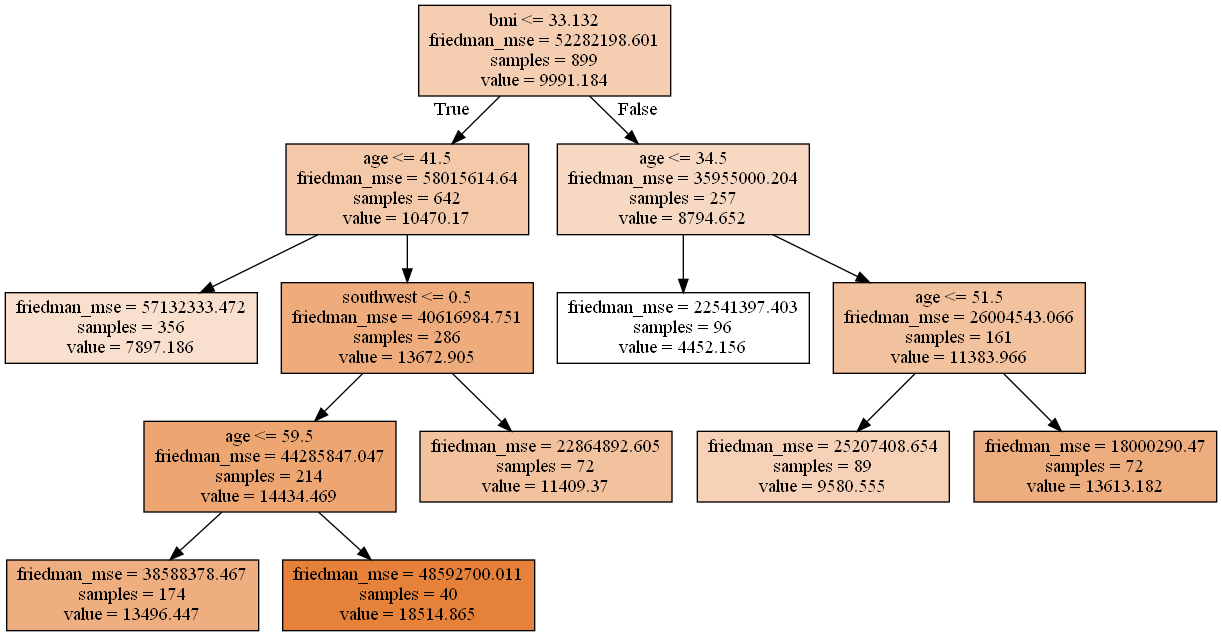

In [307]:
Image(graph.create_png())

In [308]:
# jpg, png, pdf 등으로 생성가능
graph.write_png("./reg_tree_2.jpg")

True

In [310]:
# Root node의 MSE
Root_MSE = sum((boston_['charges'] - boston_['charges'].mean())**2) / len(boston_['charges'])
print(Root_MSE)

# y값의 mean
Root_mean = boston_['charges'].mean()
Root_mean

52282198.60082794


9991.184441902104

In [311]:
col2 = ['age', 'bmi', 'children', 'male', 'female', 'southwest', 'southeast',
       'northwest', 'northeast']

In [312]:
reg_tree_im2 = reg_tree2.best_estimator_.feature_importances_

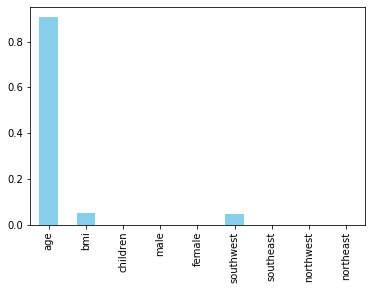

In [313]:
reg_tree_im2 = pd.Series(reg_tree_im2, col2)
reg_tree_im2.plot(kind='bar', color='skyblue')

In [315]:
print("훈련 세트 정확도: {:.3f}".format(reg_tree2.best_estimator_.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree2.best_estimator_.score(X_test, y_test)))

훈련 세트 정확도: 0.227
테스트 세트 정확도: 0.219


## 3. XGboost

In [77]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [78]:
import xgboost 
xgb_fitter = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.01, min_child_weight = 1.8, 
                                                max_depth= 3, subsample = 0.52, n_estimators = 2000, 
                                                random_state= 7, ntrhead = -1) 
xgb_fitter.fit(X_train,Y_train)

[01:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "ntrhead" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1.8, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=8, ntrhead=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=7, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.52,
             tree_method='exact', validate_parameters=1, verbosity=None)

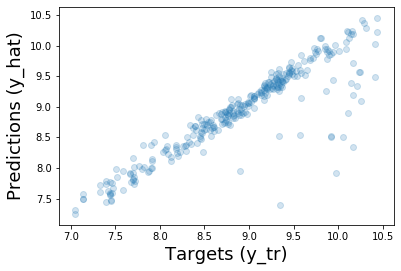

In [79]:
y_hat = xgb_fitter.predict(X_test)

plt.scatter(Y_test, y_hat, alpha = 0.2)
plt.xlabel('Targets (y_tr)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [80]:
xgb_fitter.score(X_test,Y_test)

0.8040897866239085

## 4. Random Forest

In [317]:
from sklearn.ensemble import RandomForestClassifier

In [334]:
lin = lin.astype(int)

In [416]:
X = lin.iloc[:, :-1]
y = lin.iloc[:, -1]

In [417]:
X

,age,bmi,children,male,female,southwest,southeast,northwest,northeast,no_smoker,yes_smoker
0,19,27,0,0,1,1,0,0,0,0,1
1,18,33,1,1,0,0,1,0,0,1,0
2,28,33,3,1,0,0,1,0,0,1,0
3,33,22,0,1,0,0,0,1,0,1,0
4,32,28,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,1,0,0,0,1,0,1,0
1334,18,31,0,0,1,0,0,0,1,1,0
1335,18,36,0,0,1,0,1,0,0,1,0
1336,21,25,0,0,1,1,0,0,0,1,0


In [330]:
lin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1199 non-null   int64  
 1   bmi         1199 non-null   float64
 2   children    1199 non-null   int64  
 3   male        1199 non-null   uint8  
 4   female      1199 non-null   uint8  
 5   southwest   1199 non-null   uint8  
 6   southeast   1199 non-null   uint8  
 7   northwest   1199 non-null   uint8  
 8   northeast   1199 non-null   uint8  
 9   no_smoker   1199 non-null   uint8  
 10  yes_smoker  1199 non-null   uint8  
 11  charges     1199 non-null   float64
dtypes: float64(2), int64(2), uint8(8)
memory usage: 96.2 KB


In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

In [337]:
# Feature Scaling # 각 feature의 평균을 0, 분산을 1로 변경, 모든 특성들이 같은 스케일을 갖게 됨.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# train data는 fit_transform 스케일링
X_train = sc.fit_transform(X_train)

# test data는 transform으로 스케일링
X_test = sc.transform(X_test)

In [340]:
param_grid = {'criterion':['mse','mae'], 
              'max_depth':[2,3,4,5,], 
              'max_leaf_nodes':[2,3,4,5,6], 
              'max_features':[3,4,5,6]}

In [344]:
from sklearn.ensemble import RandomForestRegressor

In [419]:
parameters = {
    "max_features":[2,3,4,5,6],
    "criterion": ["mse",'gini'],
    "n_estimators":[50,100,200,300,400]
    }

clf_rf = GridSearchCV(RandomForestRegressor(), param_grid,  n_jobs=-1)

clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_train, y_train))
print(clf_rf.best_params_)


0.610226932916009
{'criterion': 'mse', 'max_depth': 4, 'max_features': 6, 'max_leaf_nodes': 6}


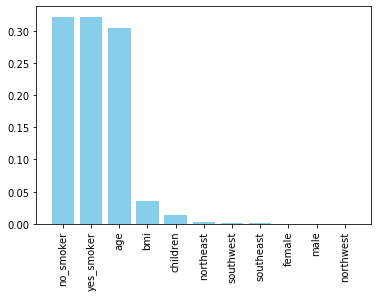

In [351]:
def plot_feature_importances(model):
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [lin.columns[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    #plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X.shape[1]), importances[indices],color='skyblue')

    # Add feature names as x-axis labels
    plt.xticks(range(X.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

plot_feature_importances(clf_rf.best_estimator_)
plt.show()

In [352]:

print(clf_rf.score(X_test,y_test))

0.6563398492525323


In [354]:
lin.columns

Index(['age', 'bmi', 'children', 'male', 'female', 'southwest', 'southeast',
       'northwest', 'northeast', 'no_smoker', 'yes_smoker', 'charges'],
      dtype='object')

In [355]:
col = ['age', 'bmi', 'children', 'male', 'female', 'southwest', 'southeast',
       'northwest', 'northeast', 'no_smoker', 'yes_smoker']

In [357]:
!pip install graphviz

In [359]:
import graphviz

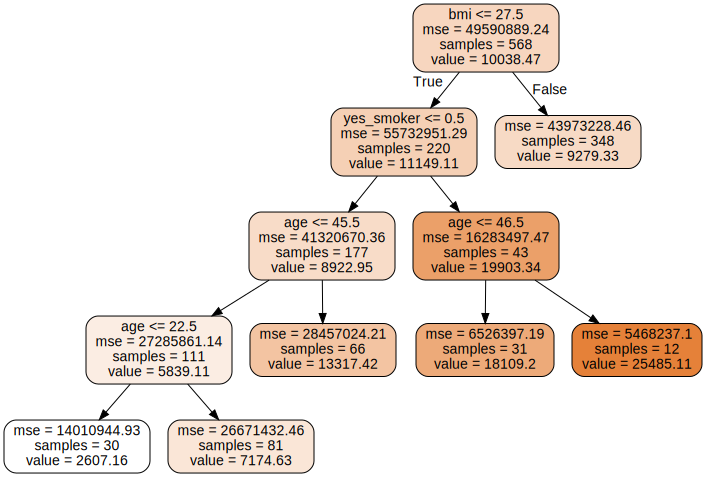

In [421]:
# randomforest 중 일부 트리 graph화
estimator = clf_rf.best_estimator_.estimators_[40]

from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

In [361]:
n_nodes = []
max_depths = []

for ind_tree in clf_rf.best_estimator_.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [362]:
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 11
Average maximum depth 3


In [363]:
# RandomForestRegressor 기준 #
from sklearn import metrics

y_pred = clf_rf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2607.8727205985333
Mean Squared Error: 18099599.281470902
Root Mean Squared Error: 4254.362382481176


In [364]:
X = lin_drop_smoker.iloc[:, :-1]
y = lin_drop_smoker.iloc[:, -1]

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

In [366]:
parameters = {
    "max_features":[2,3,4,5,6],
    "criterion": ["mse",'gini'],
    "n_estimators":[50,100,200,300,400]
    }

clf_rf2 = GridSearchCV(RandomForestRegressor(), param_grid,  n_jobs=-1)

clf_rf2.fit(X_train, y_train)
print(clf_rf2.score(X_train, y_train))
print(clf_rf2.best_params_)

0.25141916633349837
{'criterion': 'mse', 'max_depth': 4, 'max_features': 6, 'max_leaf_nodes': 6}


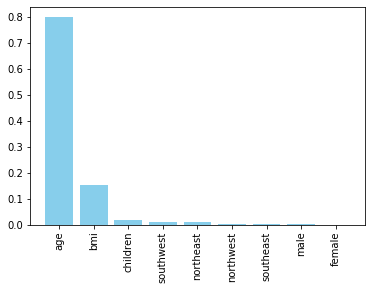

In [367]:
def plot_feature_importances(model):
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [lin_drop_smoker.columns[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    #plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X.shape[1]), importances[indices],color='skyblue')

    # Add feature names as x-axis labels
    plt.xticks(range(X.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

plot_feature_importances(clf_rf2.best_estimator_)
plt.show()

In [368]:
col2 = ['age', 'bmi', 'children', 'male', 'female', 'southwest', 'southeast',
       'northwest', 'northeast']

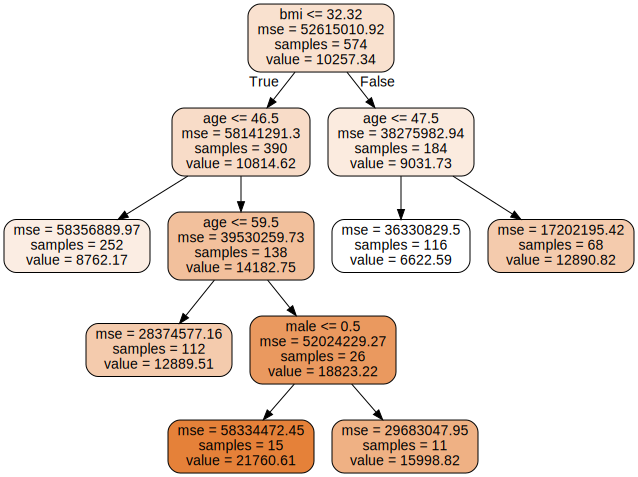

In [370]:
# randomforest 중 일부 트리 graph화
estimator = clf_rf2.best_estimator_.estimators_[50]

from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col2,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

In [371]:
n_nodes = []
max_depths = []

for ind_tree in clf_rf2.best_estimator_.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [372]:
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 11
Average maximum depth 3


## 5. Gradient Boosting

In [374]:
# GradientBoosting#
from sklearn.ensemble import GradientBoostingRegressor

In [389]:
X = lin.iloc[:, :-1]
y = lin.iloc[:, -1]

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [391]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
    "max_depth":[2,3,4,5,6],
    "n_estimators":[20,30,40,50,60,70,80,90,100]
    }

clf2 = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5, n_jobs=-1)

clf2.fit(X_train, y_train)
print(clf2.score(X_train, y_train))
print(clf2.best_params_)

0.6629251544333374
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}


In [379]:
print("Train R-squared: %.2f" %clf2.score(X_train,y_train) )
print("Test R-squared: %.2f" %clf2.score(X_test,y_test) )

Train R-squared: 0.66
Test R-squared: 0.70


In [380]:
gd_im = clf2.best_estimator_.feature_importances_

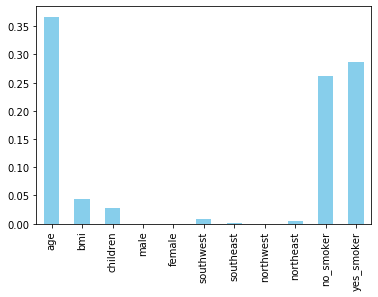

In [381]:
gd_im = pd.Series(gd_im, col)
gd_im.plot(kind='bar', color='skyblue')

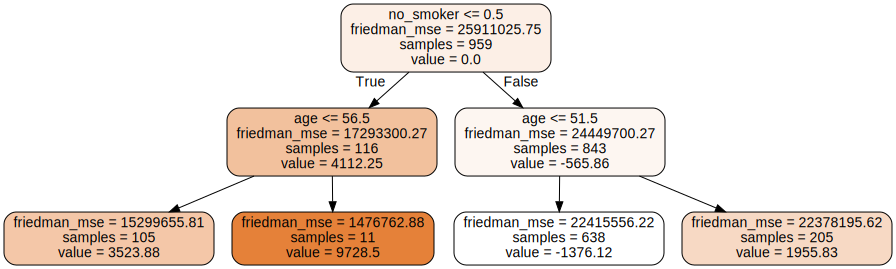

In [393]:
estimator = clf2.best_estimator_.estimators_[10][0]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

In [396]:
X = lin_drop_smoker.iloc[:, :-1]
y = lin_drop_smoker.iloc[:, -1]

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [398]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
    "max_depth":[2,3,4,5,6],
    "n_estimators":[20,30,40,50,60,70,80,90,100]
    }

clf2 = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5, n_jobs=-1)

clf2.fit(X_train, y_train)
print(clf2.score(X_train, y_train))
print(clf2.best_params_)

0.2778109654964215
{'learning_rate': 0.075, 'max_depth': 2, 'n_estimators': 50}


In [385]:
print("Train R-squared: %.2f" %clf2.score(X_train,y_train) )
print("Test R-squared: %.2f" %clf2.score(X_test,y_test) )

Train R-squared: 0.28
Test R-squared: 0.22


In [386]:
gd_im = clf2.best_estimator_.feature_importances_

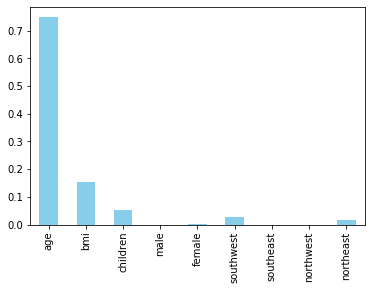

In [387]:
gd_im = pd.Series(gd_im, col2)
gd_im.plot(kind='bar', color='skyblue')

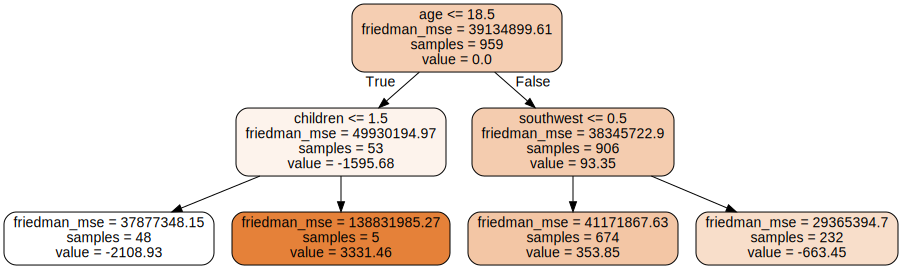

In [413]:
estimator = clf2.best_estimator_.estimators_[38][0]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = col2,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph